# **1. Modeling**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_feature.csv to df_feature (1).csv


In [ ]:
df_feature = pd.read_csv('df_feature.csv')
df_feature.head()

,car_ownership,risk_flag,house_yrs_norm,job_yrs_norm,income_norm,marital_status,house_norent_noown,house_owned,house_rented,profession_freq_enc,city_freq_enc,state_freq_enc,age_segment,experience_segment
0,0,0,0.75,0.214286,0.129487,0,0,0,1,0.020702,0.003167,0.056040,0,0
1,0,0,0.75,0.642857,0.757206,0,0,0,1,0.020052,0.003369,0.101437,1,1
2,0,0,0.00,0.285714,0.398564,1,0,0,1,0.020615,0.002730,0.023036,2,0
3,1,1,0.50,0.142857,0.625263,0,0,0,1,0.020052,0.002409,0.018484,1,0
4,0,1,1.00,0.214286,0.576454,0,0,0,1,0.017512,0.003210,0.065623,1,1


## A. Split Data Train & Test

In [ ]:
X = df_feature[[col for col in df_feature.columns if (str(df_feature[col].dtype) != 'object') and col not in ['risk_flag']]]
y = df_feature['risk_flag']
print(X.shape)
print(y.shape)

(252000, 13)
(252000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [ ]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE('all', random_state=42).fit_resample(X_train, y_train)

In [ ]:
X_train, y_train = X_over_SMOTE, y_over_SMOTE

In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('-----------------------------')
print('SMOTE')
print(pd.Series(y_train).value_counts())

Original
0    221004
1     30996
Name: risk_flag, dtype: int64
-----------------------------
SMOTE
0    154703
1    154703
Name: risk_flag, dtype: int64


## B. Modeling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def eval_classification(model):
  y_pred = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_proba = model.predict_proba(X_test)
  y_pred_proba_train = model.predict_proba(X_train)
    
  print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
  #print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
  print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
  #print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
  print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
  #print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
  print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    
  print("AUC (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
  #print("AUC (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
  #print("AUC (train-label): %.2f" % roc_auc_score(y_train, y_pred_train))
  #print("AUC (test-label): %.2f" % roc_auc_score(y_test, y_pred))

def show_feature_importance(model):
  feat_importances = pd.Series(model.feature_importances_, index=X_mod.columns)
  ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
  ax.invert_yaxis()

  plt.xlabel('score')
  plt.ylabel('feature')
  plt.title('feature importance score')

def show_best_hyperparameter(model):
  print(model.best_estimator_.get_params())

def plot_confusion_matrix(cm):
  fig,ax =plt.subplots()
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',ax=ax)
  ax.set_xticklabels(['Risk no (0)','Risk Yes (1)'])
  ax.set_yticklabels(['Risk no (0)','Risk Yes (1)'])
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Value')
  ax.set_ylabel('Actual Value')

In [ ]:
#!pip install pycaret

In [ ]:
#!pip install shap

In [ ]:
import sklearn
sklearn.__version__

'0.23.2'

In [ ]:
# initialize setup
from pycaret.classification import *

s = setup(df_feature, 
          target = 'risk_flag', 
          train_size = 0.7,
          fix_imbalance = True,
          numeric_features = [x for x in df_feature.columns if x != 'risk_flag'])

,Description,Value
0,session_id,4643
1,Target,risk_flag
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(252000, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
# compare all models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8890,0.9381,0.7858,0.5326,0.6349,0.5723,0.5873,52.284
catboost,CatBoost Classifier,0.8869,0.8767,0.7674,0.5273,0.6251,0.5612,0.5749,75.233
et,Extra Trees Classifier,0.8853,0.9378,0.7953,0.5218,0.6301,0.5657,0.5833,30.527
dummy,Dummy Classifier,0.8772,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.425
dt,Decision Tree Classifier,0.8702,0.8514,0.8365,0.4836,0.6129,0.5415,0.5709,6.683
knn,K Neighbors Classifier,0.8622,0.8780,0.7631,0.4629,0.5762,0.4997,0.5220,72.027
lightgbm,Light Gradient Boosting Machine,0.8285,0.8286,0.6737,0.3863,0.4910,0.3968,0.4191,3.872
gbc,Gradient Boosting Classifier,0.6716,0.6383,0.4967,0.1862,0.2709,0.1123,0.1348,36.662
ada,Ada Boost Classifier,0.5679,0.5623,0.5058,0.1433,0.2233,0.0395,0.0546,11.800
ridge,Ridge Classifier,0.5049,0.0000,0.5869,0.1396,0.2255,0.0338,0.0527,2.585


## C. Model Evaluation: Pemilihan dan perhitungan metrics

- Berfokus pada metric **Recall** karena ingin menekan *False Negative* untuk mengurangi angka customer yang sebenarnya beresiko tetapi diprediksi tidak beresiko.

- Melihat metric **AUC** untuk mendapatkan performa model yang tinggi.

- Melihat **waktu eksekusi** untuk mendapatkan waktu yang efektif (rendah) untuk menjalankan model.

- Berdasarkan proses perbandingan model (Pycaret) dan pertimbangan metrics, model **Decision Tree Classifier** menjadi pilihan karena memiliki nilai **Recall cukup tinggi**, nilai **AUC cukup tinggi**, dan **waktu eksekusi yang relatif rendah** diantara model lainnya.

In [ ]:
best_model = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8726,0.8567,0.8505,0.4910,0.6226,0.5524,0.5826
1,0.8705,0.8523,0.8390,0.4862,0.6156,0.5443,0.5736
2,0.8653,0.8455,0.8275,0.4742,0.6029,0.5289,0.5587
3,0.8710,0.8570,0.8459,0.4874,0.6185,0.5475,0.5777
4,0.8701,0.8530,0.8317,0.4852,0.6128,0.5412,0.5696
5,0.8719,0.8514,0.8326,0.4894,0.6164,0.5457,0.5735
6,0.8697,0.8452,0.8267,0.4843,0.6108,0.5389,0.5667
7,0.8753,0.8585,0.8414,0.4974,0.6252,0.5563,0.5839
8,0.8680,0.8497,0.8391,0.4807,0.6112,0.5387,0.5690
9,0.8686,0.8485,0.8303,0.4818,0.6097,0.5374,0.5662


## D. Model Evaluation: Apakah model sudah best-fit?

In [ ]:
best_model = create_model('dt')
predict_test=predict_model(best_model, raw_score=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8726,0.8567,0.8505,0.4910,0.6226,0.5524,0.5826
1,0.8705,0.8523,0.8390,0.4862,0.6156,0.5443,0.5736
2,0.8653,0.8455,0.8275,0.4742,0.6029,0.5289,0.5587
3,0.8710,0.8570,0.8459,0.4874,0.6185,0.5475,0.5777
4,0.8701,0.8530,0.8317,0.4852,0.6128,0.5412,0.5696
5,0.8719,0.8514,0.8326,0.4894,0.6164,0.5457,0.5735
6,0.8697,0.8452,0.8267,0.4843,0.6108,0.5389,0.5667
7,0.8753,0.8585,0.8414,0.4974,0.6252,0.5563,0.5839
8,0.8680,0.8497,0.8391,0.4807,0.6112,0.5387,0.5690
9,0.8686,0.8485,0.8303,0.4818,0.6097,0.5374,0.5662


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8709,0.8497,0.831,0.4821,0.6102,0.5393,0.568


- Nilai AUC train dan Recall Train memiliki nilai yang lebih besar dari nilai Test-nya dengan perbedaan yang sedikit. Namun, nilai Accuracy Train dengan nilai Accuracy Test memiliki perbedaan 0.0006. Jika dibulatkan sama-sama memiliki nilai 0.87.

- Dapat dikatakan bahwa model suda cukup *Best-Fit*.

## E. Hyperparameter Tuning

In [ ]:
params={'max_depth':[int(x) for x in np.linspace(1, 110, num = 30)], # Kedalaman maksimal tree
        'max_features':['auto','sqrt'], # Perhitungan untuk jumlah feature yang digunakan
        'min_samples_split':[2, 5, 10, 100, 200], # Minimum sampel yang diperlukan untuk split leaf baru
        'min_samples_leaf':[1, 2, 4, 10, 20, 50, 100] # minimum sampel yang diperlukan untuk membentuk leaf baru
        }

tuned_dt, tuner = tune_model(best_model, optimize='Accuracy', n_iter=50, custom_grid=params, return_tuner=True, fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8740,0.8729,0.8289,0.4941,0.6192,0.5494,0.5758
1,0.8710,0.8716,0.8284,0.4872,0.6136,0.5423,0.5699
2,0.8662,0.8676,0.8170,0.4758,0.6014,0.5276,0.5555
3,0.8683,0.8768,0.8431,0.4812,0.6127,0.5403,0.5712
4,0.8715,0.8772,0.8290,0.4885,0.6148,0.5438,0.5712
5,0.8731,0.8757,0.8414,0.4922,0.6211,0.5510,0.5796
6,0.8716,0.8693,0.8308,0.4887,0.6154,0.5445,0.5721
7,0.8748,0.8747,0.8354,0.4963,0.6227,0.5534,0.5804
8,0.8705,0.8722,0.8336,0.4861,0.6141,0.5427,0.5712
9,0.8706,0.8705,0.8197,0.4860,0.6102,0.5386,0.5651


In [ ]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=106, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4643, splitter='best')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8698,0.8708,0.8277,0.4794,0.6071,0.5356,0.5643


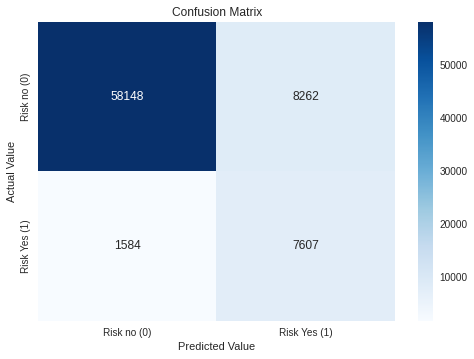

In [ ]:
predict_test_tuned = predict_model(tuned_dt, raw_score=True)
plot_confusion_matrix(confusion_matrix(predict_test_tuned.risk_flag, predict_test_tuned.Label))

- Model hasil Hyperparameter Tuning memiliki nilai Accuracy Train, AUC Train, dan Recall lebih tinggi dari nilai Test-nya dengan perbedaan nilai yang kecil. Menandakan bahwa model hasil hypertuning tidak *overfitting* maupun *underfitting*.

- Model yang dipilih dapat mendeteksi customer yang beresiko. Terlihat dari nilai Recall yang tinggi untuk meminimalisir kesalahan dalam memprediksi customer yang sebenarnya beresiko tetapi diprediksi tidak beresiko. Dari nilai AUC-nya, model memiliki nilai yang tinggi menandakan bahwa performa model sudah bagus.

# **2. Feature Importance**

In [ ]:
X_train = s[34][1][1]
y_train = s[34][2][1]
feature_names = list(X_train.columns)

In [ ]:
list_ = [x for x in X_train.columns]
X_train_feature = X_train[list_]

In [ ]:
import shap

shap_values = shap.TreeExplainer(best_model,
                                 data = X_train_feature,
                                 feature_dependence = 'independent',
                                 model_output = 'probability').shap_values(X_train_feature)

100%|===================| 351651/352798 [05:06<00:00]       

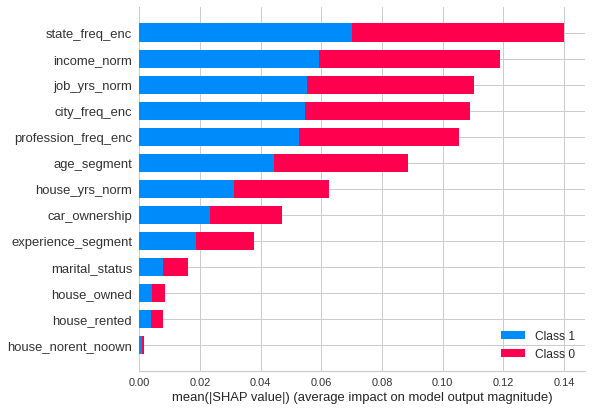

In [ ]:
shap.summary_plot(shap_values, X_train_feature,feature_names = feature_names)

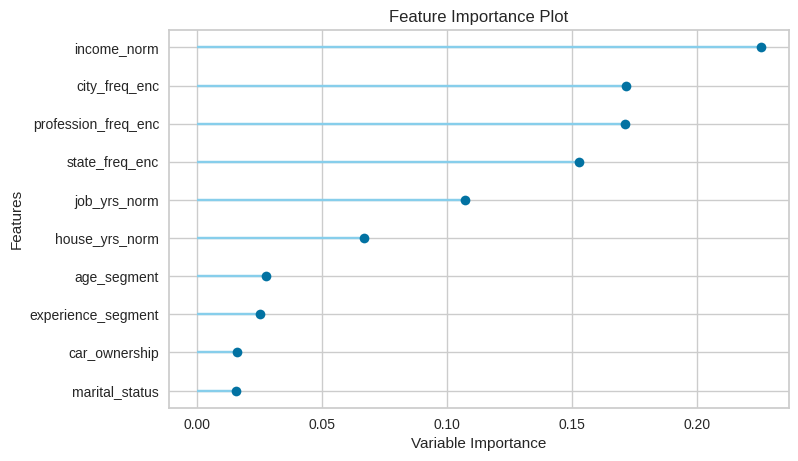

In [ ]:
plot_model(best_model,plot="feature")

Salah satu feature yang berpengaruh dengan model yang digunakan adalah income. Maka dari itu, pengaruh keberhasilan customer untuk dapat membayar pinjamannya dengan menyesuaikan income customer 